# Q 3. Section C (Algorithm implementation using packages)

In [1]:
#import all necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.metrics.pairwise import euclidean_distances
from scipy import cluster
import sklearn.metrics.pairwise as smp
from pyclustering.cluster.kmedians import kmedians
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

import warnings
warnings.filterwarnings("ignore")

# 3(a)
# Loading the dataset

In [2]:
#Load the dataset into memory
df_population=pd.read_csv("population.csv")
df_population.head()

,AAGE,ACLSWKR,ADTIND,ADTOCC,AHGA,AHRSPAY,AHSCOL,AMARITL,AMJIND,AMJOCC,...,PARENT,PEFNTVTY,PEMNTVTY,PENATVTY,PRCITSHP,SEOTR,VETQVA,VETYN,WKSWORK,YEAR
0,73,Not in universe,0,0,High school graduate,0,Not in universe,Widowed,Not in universe or children,Not in universe,...,Not in universe,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,0,95
1,58,Self-employed-not incorporated,4,34,Some college but no degree,0,Not in universe,Divorced,Construction,Precision production craft & repair,...,Not in universe,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,52,94
2,18,Not in universe,0,0,10th grade,0,High school,Never married,Not in universe or children,Not in universe,...,Not in universe,Vietnam,Vietnam,Vietnam,Foreign born- Not a citizen of U S,0,Not in universe,2,0,95
3,9,Not in universe,0,0,Children,0,Not in universe,Never married,Not in universe or children,Not in universe,...,Both parents present,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,0,0,94
4,10,Not in universe,0,0,Children,0,Not in universe,Never married,Not in universe or children,Not in universe,...,Both parents present,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,0,0,94


# 3(b) 

## Preprocessing

In [3]:
# replacing '?' with NaN
df_population=df_population.replace(' ?', np.NaN)

In [4]:
df_population.isna().sum()

AAGE            0
ACLSWKR         0
ADTIND          0
ADTOCC          0
AHGA            0
AHRSPAY         0
AHSCOL          0
AMARITL         0
AMJIND          0
AMJOCC          0
ARACE           0
AREORGN         0
ASEX            0
AUNMEM          0
AUNTYPE         0
AWKSTAT         0
CAPGAIN         0
CAPLOSS         0
DIVVAL          0
FILESTAT        0
GRINREG         0
GRINST        708
HHDFMX          0
HHDREL          0
MIGMTR1     99696
MIGMTR3     99696
MIGMTR4     99696
MIGSAME         0
MIGSUN      99696
NOEMP           0
PARENT          0
PEFNTVTY     6713
PEMNTVTY     6119
PENATVTY     3393
PRCITSHP        0
SEOTR           0
VETQVA          0
VETYN           0
WKSWORK         0
YEAR            0
dtype: int64

In [5]:
# calculating 30 percent of the data for removing corresponding columns
df_population.shape[0]*.3

59856.899999999994

In [6]:
df_population=df_population.drop(['MIGMTR1','MIGMTR3','MIGMTR4','MIGSUN'], axis=1)

In [7]:
df_population.dtypes

AAGE         int64
ACLSWKR     object
ADTIND       int64
ADTOCC       int64
AHGA        object
AHRSPAY      int64
AHSCOL      object
AMARITL     object
AMJIND      object
AMJOCC      object
ARACE       object
AREORGN     object
ASEX        object
AUNMEM      object
AUNTYPE     object
AWKSTAT     object
CAPGAIN      int64
CAPLOSS      int64
DIVVAL       int64
FILESTAT    object
GRINREG     object
GRINST      object
HHDFMX      object
HHDREL      object
MIGSAME     object
NOEMP        int64
PARENT      object
PEFNTVTY    object
PEMNTVTY    object
PENATVTY    object
PRCITSHP    object
SEOTR        int64
VETQVA      object
VETYN        int64
WKSWORK      int64
YEAR         int64
dtype: object

#  Convert numerical data into categorical data

## Preprocessing age column

In [8]:
#Display total null values
print('Total Null Values in AAGE column:')
print(df_population['AAGE'].isna().sum())

# Display minimum and maximum values
print('\nMinimum and Maximum values for AAGE column:')
print(df_population['AAGE'].min(), df_population['AAGE'].max())

Total Null Values in AAGE column:
0

Minimum and Maximum values for AAGE column:
0 90


In [9]:
df_population['AAGE'].value_counts()

34    3489
35    3450
36    3353
31    3351
33    3340
      ... 
85     423
86     348
87     301
88     241
89     195
Name: AAGE, Length: 91, dtype: int64

In [10]:
#Discretizing the AAGE column
cut_label_AAGE = ['1', '2', '3', '4', '5','6','7','8','9','10','11','12','13']

cut_bins = [0, 5, 10, 15, 20, 25, 30, 35, 40, 45,50, 60, 70, 100]

#Creating a new column using the data after binning
df_population['AAGE_bin'] = pd.cut(df_population['AAGE'], bins=cut_bins, labels=cut_label_AAGE)

# Finding counts of unique values
df_population['AAGE_bin'].value_counts()

11    17777
7     16818
1     16303
8     16166
2     15872
13    15542
3     15334
12    14855
6     14738
9     14651
5     13314
4     12937
10    12377
Name: AAGE_bin, dtype: int64

## Preprocessing ADTIND column

In [11]:
#Display total null values
print('Total Null Values in ADTIND column:')
print(df_population['ADTIND'].isna().sum())

# Display minimum and maximum values
print('\nMinimum and Maximum values for ADTIND column:')
print(df_population['ADTIND'].min(), df_population['ADTIND'].max())

Total Null Values in ADTIND column:
0

Minimum and Maximum values for ADTIND column:
0 51


In [12]:
df_population['ADTIND'].value_counts()

0     100684
33     17070
43      8283
4       5984
42      4683
45      4482
29      4209
37      4022
41      3964
32      3596
35      3380
39      2937
34      2765
44      2549
2       2196
11      1764
50      1704
40      1651
47      1644
38      1629
24      1503
12      1350
19      1346
30      1181
31      1178
25      1084
9        993
22       952
36       945
13       899
1        827
48       652
27       626
49       610
3        563
21       559
6        554
5        553
8        550
16       539
23       525
18       483
15       452
7        422
14       295
46       187
17       157
28       143
26       127
51        36
20        32
10         4
Name: ADTIND, dtype: int64

In [13]:
#Discretizing the ADTIND column 
cut_label_ADTIND = ['1', '2', '3', '4', '5','6','7']

cut_bins = [-1, 0, 10, 28, 32, 35,42,51]

#Creating a new column using the data after binning
df_population['ADTIND_bin'] = pd.cut(df_population['ADTIND'], bins=cut_bins, labels=cut_label_ADTIND)

# Finding counts of unique values
df_population['ADTIND_bin'].value_counts()

1    100684
5     23215
7     20147
6     19831
3     12836
2     12646
4     10164
Name: ADTIND_bin, dtype: int64

## Preprocessing ADTOCC column

In [14]:
#Display total null values
print('Total Null Values in ADTOCC column:')
print(df_population['ADTOCC'].isna().sum())

# Display minimum and maximum values
print('\nMinimum and Maximum values for ADTOCC column:')
print(df_population['ADTOCC'].min(), df_population['ADTOCC'].max())

Total Null Values in ADTOCC column:
0

Minimum and Maximum values for ADTOCC column:
0 46


In [15]:
df_population['ADTOCC'].value_counts()

0     100684
2       8756
26      7887
19      5413
29      5105
36      4145
34      4025
10      3683
16      3445
23      3392
12      3340
33      3325
3       3195
35      3168
38      3003
31      2699
32      2398
37      2234
8       2151
42      1918
30      1897
24      1847
17      1771
28      1661
44      1592
41      1592
43      1382
4       1364
13      1271
18      1083
39      1017
14       932
5        855
15       815
27       780
25       767
9        738
7        731
11       637
40       617
1        544
21       533
6        441
22       411
45       172
20        71
46        36
Name: ADTOCC, dtype: int64

In [16]:
#Discretizing the ADTOCC column 
cut_label_ADTOCC = ['1', '2', '3', '4', '5','6','7']

cut_bins = [-1, 0, 5, 15, 25, 30, 35, 46]

#Creating a new column using the data after binning
df_population['ADTOCC_bin'] = pd.cut(df_population['ADTOCC'], bins=cut_bins, labels=cut_label_ADTOCC)

# Finding counts of unique values
df_population['ADTOCC_bin'].value_counts()

1    100684
4     18733
7     17708
5     17330
6     15615
3     14739
2     14714
Name: ADTOCC_bin, dtype: int64

## Preprocessing AHRSPAY column

In [17]:
#Display total null values
print('Total Null Values in AHRSPAY column:')
print(df_population['AHRSPAY'].isna().sum())

# Display minimum and maximum values
print('\nMinimum and Maximum values for AHRSPAY column:')
print(df_population['AHRSPAY'].min(), df_population['AHRSPAY'].max())

Total Null Values in AHRSPAY column:
0

Minimum and Maximum values for AHRSPAY column:
0 9999


In [18]:
df_population['AHRSPAY'].value_counts()

0       188219
500        734
600        546
700        534
800        507
         ...  
743          1
584          1
170          1
1265         1
2142         1
Name: AHRSPAY, Length: 1240, dtype: int64

In [19]:
#Discretizing the AHRSPAY column 
cut_label_AHRSPAY = ['1', '2']

cut_bins = [-1, 0,999]

#Creating a new column using the data after binning
df_population['AHRSPAY_bin'] = pd.cut(df_population['AHRSPAY'], bins=cut_bins, labels=cut_label_AHRSPAY)

# Finding counts of unique values
df_population['AHRSPAY_bin'].value_counts()

1    188219
2      7157
Name: AHRSPAY_bin, dtype: int64

## Preprocessing CAPGAIN column

In [20]:
#Display total null values
print('Total Null Values in CAPGAIN column:')
print(df_population['CAPGAIN'].isna().sum())

# Display minimum and maximum values
print('\nMinimum and Maximum values for CAPGAIN column:')
print(df_population['CAPGAIN'].min(), df_population['CAPGAIN'].max())

Total Null Values in CAPGAIN column:
0

Minimum and Maximum values for CAPGAIN column:
0 99999


In [21]:
df_population['CAPGAIN'].value_counts()

0        192144
15024       788
7688        609
7298        582
99999       390
          ...  
2227          1
4594          1
2387          1
1140          1
2601          1
Name: CAPGAIN, Length: 132, dtype: int64

In [22]:
#Discretizing the CAPGAIN column 
cut_label_CAPGAIN = ['1', '2']

cut_bins = [-1, 0, 99999]
#Creating a new column using the data after binning
df_population['CAPGAIN_bin'] = pd.cut(df_population['CAPGAIN'], bins=cut_bins, labels=cut_label_CAPGAIN)

# Finding counts of unique values
df_population['CAPGAIN_bin'].value_counts()

1    192144
2      7379
Name: CAPGAIN_bin, dtype: int64

## Preprocessing CAPLOSS column

In [23]:
#Display total null values
print('Total Null Values in CAPLOSS column:')
print(df_population['CAPLOSS'].isna().sum())

# Display minimum and maximum values
print('\nMinimum and Maximum values for CAPLOSS column:')
print(df_population['CAPLOSS'].min(), df_population['CAPLOSS'].max())

Total Null Values in CAPLOSS column:
0

Minimum and Maximum values for CAPLOSS column:
0 4608


In [24]:
df_population['CAPLOSS'].value_counts()

0       195617
1902       407
1977       381
1887       364
1602       193
         ...  
974          2
155          1
2080         1
2519         1
1911         1
Name: CAPLOSS, Length: 113, dtype: int64

In [25]:
#Discretizing the CAPLOSS column 
cut_label_CAPLOSS = ['1', '2']

cut_bins = [-1, 0, 4608]

#Creating a new column using the data after binning
df_population['CAPLOSS_bin'] = pd.cut(df_population['CAPLOSS'], bins=cut_bins, labels=cut_label_CAPLOSS)

# Finding counts of unique values
df_population['CAPLOSS_bin'].value_counts()

1    195617
2      3906
Name: CAPLOSS_bin, dtype: int64

## Preprocessing DIVVAL column

In [26]:
#Display total null values
print('Total Null Values in DIVVAL column:')
print(df_population['DIVVAL'].isna().sum())

# Display minimum and maximum values
print('\nMinimum and Maximum values for DIVVAL column:')
print(df_population['DIVVAL'].min(), df_population['DIVVAL'].max())


Total Null Values in DIVVAL column:
0

Minimum and Maximum values for DIVVAL column:
0 99999


In [27]:
df_population['DIVVAL'].value_counts()

0        178382
100        1148
500        1030
1000        894
200         866
          ...  
568           1
1309          1
21100         1
5663          1
5024          1
Name: DIVVAL, Length: 1478, dtype: int64

In [28]:
#Discretizing the DIVVAL column
cut_label_DIVVAL = ['1', '2']

cut_bins = [-1, 0, 4608]

#Creating a new column using the data after binning
df_population['DIVVAL_bin'] = pd.cut(df_population['DIVVAL'], bins=cut_bins, labels=cut_label_DIVVAL)

# Finding counts of unique values
df_population['DIVVAL_bin'].value_counts()

1    178382
2     19155
Name: DIVVAL_bin, dtype: int64

## Preprocessing NOEMP column

In [29]:
#Display total null values
print('Total Null Values in NOEMP column:')
print(df_population['NOEMP'].isna().sum())

# Display minimum and maximum values
print('\nMinimum and Maximum values for NOEMP column:')
print(df_population['NOEMP'].min(), df_population['NOEMP'].max())

Total Null Values in NOEMP column:
0

Minimum and Maximum values for NOEMP column:
0 6


In [30]:
df_population['NOEMP'].value_counts()

0    95983
6    36511
1    23109
4    14379
3    13425
2    10081
5     6035
Name: NOEMP, dtype: int64

## Preprocessing SEOTR column

In [31]:
#Display total null values
print('Total Null Values in SEOTR column:')
print(df_population['SEOTR'].isna().sum())

# Display minimum and maximum values
print('\nMinimum and Maximum values for SEOTR column:')
print(df_population['SEOTR'].min(), df_population['SEOTR'].max())


Total Null Values in SEOTR column:
0

Minimum and Maximum values for SEOTR column:
0 2


In [32]:
df_population['SEOTR'].value_counts()

0    180672
2     16153
1      2698
Name: SEOTR, dtype: int64

## Preprocessing VETYN column

In [33]:
#Display total null values
print('Total Null Values in VETYN column:')
print(df_population['VETYN'].isna().sum())

# Display minimum and maximum values
print('\nMinimum and Maximum values for VETYN column:')
print(df_population['VETYN'].min(), df_population['VETYN'].max())


Total Null Values in VETYN column:
0

Minimum and Maximum values for VETYN column:
0 2


In [34]:
df_population['VETYN'].value_counts()

2    150130
0     47409
1      1984
Name: VETYN, dtype: int64

## Preprocessing WKSWORK column

In [35]:
#Display total null values
print('Total Null Values in WKSWORK column:')
print(df_population['WKSWORK'].isna().sum())

# Display minimum and maximum values
print('\nMinimum and Maximum values for WKSWORK column:')
print(df_population['WKSWORK'].min(), df_population['WKSWORK'].max())


Total Null Values in WKSWORK column:
0

Minimum and Maximum values for WKSWORK column:
0 52


In [36]:
df_population['WKSWORK'].value_counts()

0     95983
52    70314
40     2790
50     2304
26     2268
48     1806
12     1780
30     1378
20     1330
8      1126
36     1108
16      945
32      883
44      845
51      819
24      767
4       757
46      708
35      704
10      694
45      669
6       646
39      602
42      573
28      568
49      509
13      496
1       464
2       458
25      457
3       417
38      380
43      374
22      370
15      353
17      331
5       309
47      278
18      272
14      257
9       239
34      230
7       152
21      135
37      123
41       88
33       81
11       78
27       76
23       67
29       63
31       51
19       48
Name: WKSWORK, dtype: int64

In [37]:
#Discretizing the WKSWORK column
cut_label_WKSWORK = ['1', '2', '3', '4']

cut_bins = [-1, 0, 30, 51, 52]

#Creating a new column using the data after binning
df_population['WKSWORK_bin'] = pd.cut(df_population['WKSWORK'], bins=cut_bins, labels=cut_label_WKSWORK)

# Finding counts of unique values
df_population['WKSWORK_bin'].value_counts()

1    95983
4    70314
2    17301
3    15925
Name: WKSWORK_bin, dtype: int64

## Preprocessing YEAR column

In [38]:
#Display total null values
print('Total Null Values in YEAR column:')
print(df_population['YEAR'].isna().sum())

# Display minimum and maximum values
print('\nMinimum and Maximum values for YEAR column:')
print(df_population['YEAR'].min(), df_population['YEAR'].max())

Total Null Values in YEAR column:
0

Minimum and Maximum values for YEAR column:
94 95


In [39]:
df_population['YEAR'].value_counts()

94    99827
95    99696
Name: YEAR, dtype: int64

# Q3 (c) 

## Imputation, Bucketization, One-Hot Encoding :

## Imputation: Using mode for each feature, replace the missing values in each column in population.csv dataset

In [40]:
# replacing missing values with mode
cols = df_population.columns
df_population[cols]=df_population[cols].fillna(df_population.mode().iloc[0])

In [41]:
df_population.isna().sum()

AAGE           0
ACLSWKR        0
ADTIND         0
ADTOCC         0
AHGA           0
AHRSPAY        0
AHSCOL         0
AMARITL        0
AMJIND         0
AMJOCC         0
ARACE          0
AREORGN        0
ASEX           0
AUNMEM         0
AUNTYPE        0
AWKSTAT        0
CAPGAIN        0
CAPLOSS        0
DIVVAL         0
FILESTAT       0
GRINREG        0
GRINST         0
HHDFMX         0
HHDREL         0
MIGSAME        0
NOEMP          0
PARENT         0
PEFNTVTY       0
PEMNTVTY       0
PENATVTY       0
PRCITSHP       0
SEOTR          0
VETQVA         0
VETYN          0
WKSWORK        0
YEAR           0
AAGE_bin       0
ADTIND_bin     0
ADTOCC_bin     0
AHRSPAY_bin    0
CAPGAIN_bin    0
CAPLOSS_bin    0
DIVVAL_bin     0
WKSWORK_bin    0
dtype: int64

In [42]:
# selecting columns with object datatypes
df_population_obj = df_population.select_dtypes(include=[np.object])
df_population_obj.columns

Index(['ACLSWKR', 'AHGA', 'AHSCOL', 'AMARITL', 'AMJIND', 'AMJOCC', 'ARACE',
       'AREORGN', 'ASEX', 'AUNMEM', 'AUNTYPE', 'AWKSTAT', 'FILESTAT',
       'GRINREG', 'GRINST', 'HHDFMX', 'HHDREL', 'MIGSAME', 'PARENT',
       'PEFNTVTY', 'PEMNTVTY', 'PENATVTY', 'PRCITSHP', 'VETQVA'],
      dtype='object')

# Bucketization:

In [43]:
# The categorical values of each of the categorical attributes were studied and these appear to be different ,
# hence a logical bucketization appeared not to be possible and therefore was not performed.

#  One-Hot Encoding:

In [44]:
# one hot encode the required features
df_population_one_hot_encoded_data = pd.get_dummies(df_population[['ACLSWKR', 'AHGA', 'AHSCOL', 'AMARITL', 'AMJIND', 'AMJOCC', 'ARACE',
       'AREORGN', 'ASEX', 'AUNMEM', 'AUNTYPE', 'AWKSTAT', 'FILESTAT',
       'GRINREG', 'GRINST', 'HHDFMX', 'HHDREL', 'MIGSAME', 'PARENT',
       'PEFNTVTY', 'PEMNTVTY', 'PENATVTY', 'PRCITSHP', 'VETQVA']], columns = ['ACLSWKR', 'AHGA', 'AHSCOL', 'AMARITL', 'AMJIND', 'AMJOCC', 'ARACE',
       'AREORGN', 'ASEX', 'AUNMEM', 'AUNTYPE', 'AWKSTAT', 'FILESTAT',
       'GRINREG', 'GRINST', 'HHDFMX', 'HHDREL', 'MIGSAME', 'PARENT',
       'PEFNTVTY', 'PEMNTVTY', 'PENATVTY', 'PRCITSHP', 'VETQVA'])
print(df_population_one_hot_encoded_data)

        ACLSWKR_ Federal government  ACLSWKR_ Local government  \
0                                 0                          0   
1                                 0                          0   
2                                 0                          0   
3                                 0                          0   
4                                 0                          0   
...                             ...                        ...   
199518                            0                          0   
199519                            0                          0   
199520                            0                          0   
199521                            0                          0   
199522                            0                          0   

        ACLSWKR_ Never worked  ACLSWKR_ Not in universe  ACLSWKR_ Private  \
0                           0                         1                 0   
1                           0                        

In [45]:
# selecting columns with integer datatypes
df_population_int =df_population[['AAGE_bin', 'ADTOCC_bin', 'ADTIND_bin',
       'AHRSPAY_bin', 'CAPGAIN_bin', 'CAPLOSS_bin', 'DIVVAL_bin', 'NOEMP',
       'SEOTR', 'VETYN', 'WKSWORK_bin', 'YEAR']]

In [46]:
# Create concatenated dataframe
data_population = pd.concat([df_population_int, df_population_one_hot_encoded_data], axis=1) 

# Q3 (d)

# Clustering

In [47]:
data_population_1 = data_population.copy()
data_population_1['Label'] = -1

## Performing Principal Component Analysis 

In [48]:
pca = PCA(n_components=2)
data_population_pca = pca.fit_transform(data_population)

## Finding the average within-cluster distance for the number of clusters (k) in the range 10 to 25

In [49]:
# Create empty lists to store cluster size and average within-cluster distances 
ks = []
avg_dist = []

# The kmedians function requires the initial value of medians to be given to it as an input.
# However, no such value are given in the data, hence, we have used kmeans where k is ranging from 10 to 24 to find out
# the set of centroids per value of k. These centroid values have been given as input to the kmedians function assuming
# the centroids in the kmeans are the most central points in the clusters formed.

for k in range(10,25):
    model = KMeans(n_clusters=k, random_state=0).fit(data_population_pca)
    centers = np.array(model.cluster_centers_)
    ks.append(k)
    # Create instance of K-Medians algorithm.
    kmedians_instance = kmedians(data_population_pca, initial_medians = centers)
    # Run cluster analysis and obtain results.
    kmedians_instance.process()
    clusters = kmedians_instance.get_clusters()
    medians = kmedians_instance.get_medians()
    for i in range(len(clusters)):
        data_population_1.iloc[data_population_1.index.isin(clusters[i]),-1]=i
    new_df_population = pd.DataFrame(data_population_pca, columns=['PC1','PC2'])
    new_df_population['Label'] = data_population_1['Label']
    dists=[]
    for i, (mx, my) in enumerate(medians):
        a= pd.DataFrame()
        a=new_df_population[new_df_population['Label'] == i].iloc[:, :-1]
        # To find out average within-cluster distance we have used dist = euclidean distance between (PC1, PC2) and (median1, median2)
        a['dist'] = np.sqrt((a['PC1']-medians[i][0])**2+(a['PC2']-medians[i][1])**2)
        dists.append(np.mean(a['dist']))
    avg_dist.append(np.mean(dists))

## Plotting the average within-cluster distance vs. a number of clusters graph.


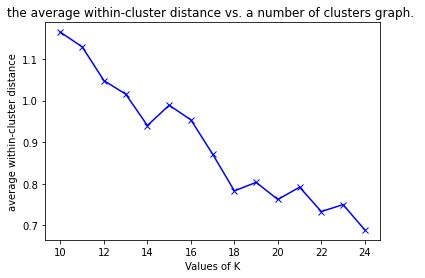

In [50]:
plt.plot(ks, avg_dist, 'bx-') 
plt.xlabel('Values of K') 
plt.ylabel('average within-cluster distance') 
plt.title('the average within-cluster distance vs. a number of clusters graph. ') 
plt.show()

# Choosing the best value of k

In [51]:
# From the above plot , the best value of k appears to be at k=24.However, as a comparision has to be made between the
# clusters formed between population.csv and  more_than_50k.csv, so we tried to choose that particular value of k which
# was optimally good and at the same time common across both the datasets.

#For more_than_50k.csv the best value of k came at k=22, so we decided to use k=22 for both the datasets so that direct
#comparision can be made between the clusters of the two datasets.

# Q3 (e)

# Handling more_than_50k data

In [52]:
# All the steps adopted on population.csv as per parts a, b, c and d have been duplicated in part e for more_than_50k.csv 

# Loading the dataset

In [53]:
df_more_than_50k=pd.read_csv("more_than_50k.csv")
df_more_than_50k.head()

,AAGE,ACLSWKR,ADTIND,ADTOCC,AHGA,AHRSPAY,AHSCOL,AMARITL,AMJIND,AMJOCC,...,PARENT,PEFNTVTY,PEMNTVTY,PENATVTY,PRCITSHP,SEOTR,VETQVA,VETYN,WKSWORK,YEAR
0,57,Self-employed-incorporated,11,2,High school graduate,0,Not in universe,Married-civilian spouse present,Manufacturing-durable goods,Executive admin and managerial,...,Not in universe,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,52,95
1,44,Private,3,38,High school graduate,0,Not in universe,Married-civilian spouse present,Mining,Transportation and material moving,...,Not in universe,United-States,United-States,United-States,Native- Born in the United States,0,No,1,48,94
2,54,Private,19,26,High school graduate,1550,Not in universe,Married-civilian spouse present,Manufacturing-nondurable goods,Adm support including clerical,...,Not in universe,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,52,94
3,25,Private,33,2,9th grade,0,Not in universe,Never married,Retail trade,Executive admin and managerial,...,Not in universe,United-States,United-States,United-States,Native- Born in the United States,1,Not in universe,2,52,95
4,26,Private,11,5,Bachelors degree(BA AB BS),0,Not in universe,Married-civilian spouse present,Manufacturing-durable goods,Professional specialty,...,Not in universe,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,52,95


## Preprocessing

In [54]:
df_more_than_50k=df_more_than_50k.replace(' ?', np.NaN)

In [55]:
df_more_than_50k.isna().sum()

AAGE           0
ACLSWKR        0
ADTIND         0
ADTOCC         0
AHGA           0
AHRSPAY        0
AHSCOL         0
AMARITL        0
AMJIND         0
AMJOCC         0
ARACE          0
AREORGN        0
ASEX           0
AUNMEM         0
AUNTYPE        0
AWKSTAT        0
CAPGAIN        0
CAPLOSS        0
DIVVAL         0
FILESTAT       0
GRINREG        0
GRINST        14
HHDFMX         0
HHDREL         0
MIGMTR1     1906
MIGMTR3     1906
MIGMTR4     1906
MIGSAME        0
MIGSUN      1906
NOEMP          0
PARENT         0
PEFNTVTY     162
PEMNTVTY     134
PENATVTY      93
PRCITSHP       0
SEOTR          0
VETQVA         0
VETYN          0
WKSWORK        0
YEAR           0
dtype: int64

In [56]:
df_more_than_50k.shape[0]*.3

1074.0

In [57]:
df_more_than_50k=df_more_than_50k.drop(['MIGMTR1','MIGMTR3','MIGMTR4','MIGSUN'], axis=1)

In [58]:
df_more_than_50k.columns

Index(['AAGE', 'ACLSWKR', 'ADTIND', 'ADTOCC', 'AHGA', 'AHRSPAY', 'AHSCOL',
       'AMARITL', 'AMJIND', 'AMJOCC', 'ARACE', 'AREORGN', 'ASEX', 'AUNMEM',
       'AUNTYPE', 'AWKSTAT', 'CAPGAIN', 'CAPLOSS', 'DIVVAL', 'FILESTAT',
       'GRINREG', 'GRINST', 'HHDFMX', 'HHDREL', 'MIGSAME', 'NOEMP', 'PARENT',
       'PEFNTVTY', 'PEMNTVTY', 'PENATVTY', 'PRCITSHP', 'SEOTR', 'VETQVA',
       'VETYN', 'WKSWORK', 'YEAR'],
      dtype='object')

In [59]:
df_more_than_50k.dtypes

AAGE         int64
ACLSWKR     object
ADTIND       int64
ADTOCC       int64
AHGA        object
AHRSPAY      int64
AHSCOL      object
AMARITL     object
AMJIND      object
AMJOCC      object
ARACE       object
AREORGN     object
ASEX        object
AUNMEM      object
AUNTYPE     object
AWKSTAT     object
CAPGAIN      int64
CAPLOSS      int64
DIVVAL       int64
FILESTAT    object
GRINREG     object
GRINST      object
HHDFMX      object
HHDREL      object
MIGSAME     object
NOEMP        int64
PARENT      object
PEFNTVTY    object
PEMNTVTY    object
PENATVTY    object
PRCITSHP    object
SEOTR        int64
VETQVA      object
VETYN        int64
WKSWORK      int64
YEAR         int64
dtype: object

##  Convert numerical data into categorical data

## Preprocessing age column

In [60]:
#Display total null values
print('Total Null Values in AAGE column:')
print(df_more_than_50k['AAGE'].isna().sum())

# Display minimum and maximum values
print('\nMinimum and Maximum values for AAGE column:')
print(df_more_than_50k['AAGE'].min(), df_more_than_50k['AAGE'].max())

Total Null Values in AAGE column:
0

Minimum and Maximum values for AAGE column:
18 90


In [61]:
df_more_than_50k['AAGE'].value_counts()

46    154
47    140
39    132
37    124
45    123
     ... 
20      1
89      1
88      1
83      1
18      1
Name: AAGE, Length: 73, dtype: int64

In [62]:
#Discretizing the AAGE column 

cut_label_AAGE = ['1', '2', '3', '4', '5','6','7','8']

cut_bins = [18, 30, 35, 40, 45,50, 60, 70, 90]

#Creating a new column using the data after binning
df_more_than_50k['AAGE_bin'] = pd.cut(df_more_than_50k['AAGE'], bins=cut_bins, labels=cut_label_AAGE)

# Finding counts of unique values
df_more_than_50k['AAGE_bin'].value_counts()

6    700
5    626
3    589
4    571
2    439
7    277
1    241
8    136
Name: AAGE_bin, dtype: int64

## Preprocessing ADTIND column

In [63]:
#Display total null values
print('Total Null Values in ADTIND column:')
print(df_more_than_50k['ADTIND'].isna().sum())

# Display minimum and maximum values
print('\nMinimum and Maximum values for ADTIND column:')
print(df_more_than_50k['ADTIND'].min(), df_more_than_50k['ADTIND'].max())

Total Null Values in ADTIND column:
0

Minimum and Maximum values for ADTIND column:
0 51


In [64]:
df_more_than_50k['ADTIND'].value_counts()

45    321
0     275
43    267
33    210
32    170
4     168
42    163
35    160
41    158
34    157
37    127
29    125
47     92
12     85
50     83
11     83
25     83
30     78
31     72
13     62
16     45
3      44
49     44
24     41
38     36
9      35
44     32
40     31
2      31
39     30
19     26
23     26
15     26
48     23
8      22
14     22
26     16
27     15
5      14
46     13
18     11
1      10
7      10
21      9
22      7
6       7
20      5
17      4
51      3
28      2
36      1
Name: ADTIND, dtype: int64

In [65]:
#Discretizing the ADTIND column 
cut_label_ADTIND = ['1', '2', '3', '4', '5','6','7']

cut_bins = [-1, 0, 10, 28, 32, 35,42,51]

#Creating a new column using the data after binning
df_more_than_50k['ADTIND_bin'] = pd.cut(df_more_than_50k['ADTIND'], bins=cut_bins, labels=cut_label_ADTIND)

# Finding counts of unique values
df_more_than_50k['ADTIND_bin'].value_counts()

7    878
3    568
6    546
5    527
4    445
2    341
1    275
Name: ADTIND_bin, dtype: int64

## Preprocessing ADTOCC column

In [66]:
#Display total null values
print('Total Null Values in ADTOCC column:')
print(df_more_than_50k['ADTOCC'].isna().sum())

# Display minimum and maximum values
print('\nMinimum and Maximum values for ADTOCC column:')
print(df_more_than_50k['ADTOCC'].min(), df_more_than_50k['ADTOCC'].max())

Total Null Values in ADTOCC column:
0

Minimum and Maximum values for ADTOCC column:
0 46


In [67]:
df_more_than_50k['ADTOCC'].value_counts()

2     820
0     275
4     189
3     185
16    174
11    137
12    136
7     134
17    130
10    120
8     115
34    104
33    101
18     91
35     82
5      79
28     73
9      60
36     52
26     50
15     47
6      46
38     40
14     38
19     35
1      31
43     29
21     27
39     25
37     22
13     17
23     16
30     11
25     11
32     10
24     10
45      8
29      8
44      8
31      7
22      6
41      6
40      5
42      5
46      3
20      2
Name: ADTOCC, dtype: int64

In [68]:
#Discretizing the ADTOCC column 
cut_label_ADTOCC = ['1', '2', '3', '4', '5','6','7']

cut_bins = [-1, 0, 5, 15, 25, 30, 35, 46]

#Creating a new column using the data after binning
df_more_than_50k['ADTOCC_bin'] = pd.cut(df_more_than_50k['ADTOCC'], bins=cut_bins, labels=cut_label_ADTOCC)

# Finding counts of unique values
df_more_than_50k['ADTOCC_bin'].value_counts()

2    1304
3     850
4     502
6     304
1     275
7     203
5     142
Name: ADTOCC_bin, dtype: int64

## Preprocessing AHRSPAY column

In [69]:
#Display total null values
print('Total Null Values in AHRSPAY column:')
print(df_more_than_50k['AHRSPAY'].isna().sum())

# Display minimum and maximum values
print('\nMinimum and Maximum values for AHRSPAY column:')
print(df_more_than_50k['AHRSPAY'].min(), df_more_than_50k['AHRSPAY'].max())

Total Null Values in AHRSPAY column:
0

Minimum and Maximum values for AHRSPAY column:
0 8000


In [70]:
df_more_than_50k['AHRSPAY'].value_counts()

0       3431
2100       9
2000       8
1700       5
2200       5
        ... 
525        1
585        1
625        1
2700       1
2010       1
Name: AHRSPAY, Length: 85, dtype: int64

In [71]:
#Discretizing the AHRSPAY column 
cut_label_AHRSPAY = ['1', '2']

cut_bins = [-1, 0,999]

#Creating a new column using the data after binning
df_more_than_50k['AHRSPAY_bin'] = pd.cut(df_more_than_50k['AHRSPAY'], bins=cut_bins, labels=cut_label_AHRSPAY)

# Finding counts of unique values
df_more_than_50k['AHRSPAY_bin'].value_counts()

1    3431
2      32
Name: AHRSPAY_bin, dtype: int64

## Preprocessing CAPGAIN column

In [72]:
#Display total null values
print('Total Null Values in CAPGAIN column:')
print(df_more_than_50k['CAPGAIN'].isna().sum())

# Display minimum and maximum values
print('\nMinimum and Maximum values for CAPGAIN column:')
print(df_more_than_50k['CAPGAIN'].min(), df_more_than_50k['CAPGAIN'].max())

Total Null Values in CAPGAIN column:
0

Minimum and Maximum values for CAPGAIN column:
0 99999


In [73]:
df_more_than_50k['CAPGAIN'].value_counts()

0        2902
15024     193
7688       97
99999      93
7298       54
27828      32
14084      26
10520      24
20051      21
4787       20
13550      20
10605      14
5178       10
9386       10
3103        8
4934        7
7430        5
18481       5
6514        5
6097        4
25124       4
25236       4
11678       3
15831       2
4687        2
15020       2
7896        2
7262        2
4386        1
8614        1
9562        1
2653        1
3273        1
3456        1
5556        1
6612        1
4064        1
Name: CAPGAIN, dtype: int64

In [74]:
#Discretizing the CAPGAIN column 
cut_label_CAPGAIN = ['1', '2']

cut_bins = [-1, 0, 99999]
#Creating a new column using the data after binning
df_more_than_50k['CAPGAIN_bin'] = pd.cut(df_more_than_50k['CAPGAIN'], bins=cut_bins, labels=cut_label_CAPGAIN)

# Finding counts of unique values
df_more_than_50k['CAPGAIN_bin'].value_counts()

1    2902
2     678
Name: CAPGAIN_bin, dtype: int64

## Preprocessing CAPLOSS column

In [75]:
#Display total null values
print('Total Null Values in CAPLOSS column:')
print(df_more_than_50k['CAPLOSS'].isna().sum())

# Display minimum and maximum values
print('\nMinimum and Maximum values for CAPLOSS column:')
print(df_more_than_50k['CAPLOSS'].min(), df_more_than_50k['CAPLOSS'].max())

Total Null Values in CAPLOSS column:
0

Minimum and Maximum values for CAPLOSS column:
0 3004


In [76]:
df_more_than_50k['CAPLOSS'].value_counts()

0       3243
1902      89
1977      87
2415      32
1887      28
2258      19
2824      12
1564      10
2559       9
2444       6
2174       5
2377       4
2472       3
2392       3
323        3
2282       3
3004       3
2246       2
1825       2
653        2
1848       2
2547       2
1408       2
1092       1
2231       1
1669       1
1380       1
1740       1
1876       1
1485       1
625        1
2090       1
Name: CAPLOSS, dtype: int64

In [77]:
#Discretizing the CAPLOSS column 
cut_label_CAPLOSS = ['1', '2']

cut_bins = [-1, 0, 4608]

#Creating a new column using the data after binning
df_more_than_50k['CAPLOSS_bin'] = pd.cut(df_more_than_50k['CAPLOSS'], bins=cut_bins, labels=cut_label_CAPLOSS)

# Finding counts of unique values
df_more_than_50k['CAPLOSS_bin'].value_counts()

1    3243
2     337
Name: CAPLOSS_bin, dtype: int64

## Preprocessing DIVVAL column

In [78]:
#Display total null values
print('Total Null Values in DIVVAL column:')
print(df_more_than_50k['DIVVAL'].isna().sum())

# Display minimum and maximum values
print('\nMinimum and Maximum values for DIVVAL column:')
print(df_more_than_50k['DIVVAL'].min(), df_more_than_50k['DIVVAL'].max())


Total Null Values in DIVVAL column:
0

Minimum and Maximum values for DIVVAL column:
0 99999


In [79]:
df_more_than_50k['DIVVAL'].value_counts()

0        2023
1000      104
100        81
500        77
200        65
         ... 
2022        1
7616        1
6062        1
12173       1
1700        1
Name: DIVVAL, Length: 302, dtype: int64

In [80]:
#Discretizing the DIVVAL column 
cut_label_DIVVAL = ['1', '2']

cut_bins = [-1, 0, 4608]

#Creating a new column using the data after binning
df_more_than_50k['DIVVAL_bin'] = pd.cut(df_more_than_50k['DIVVAL'], bins=cut_bins, labels=cut_label_DIVVAL)

# Finding counts of unique values
df_more_than_50k['DIVVAL_bin'].value_counts()

1    2023
2    1292
Name: DIVVAL_bin, dtype: int64

## Preprocessing NOEMP column

In [81]:
#Display total null values
print('Total Null Values in NOEMP column:')
print(df_more_than_50k['NOEMP'].isna().sum())

# Display minimum and maximum values
print('\nMinimum and Maximum values for NOEMP column:')
print(df_more_than_50k['NOEMP'].min(), df_more_than_50k['NOEMP'].max())

Total Null Values in NOEMP column:
0

Minimum and Maximum values for NOEMP column:
0 6


In [82]:
df_more_than_50k['NOEMP'].value_counts()

6    1601
1     592
4     429
3     353
2     232
5     196
0     177
Name: NOEMP, dtype: int64

## Preprocessing SEOTR column

In [83]:
#Display total null values
print('Total Null Values in SEOTR column:')
print(df_more_than_50k['SEOTR'].isna().sum())

# Display minimum and maximum values
print('\nMinimum and Maximum values for SEOTR column:')
print(df_more_than_50k['SEOTR'].min(), df_more_than_50k['SEOTR'].max())


Total Null Values in SEOTR column:
0

Minimum and Maximum values for SEOTR column:
0 2


In [84]:
df_more_than_50k['SEOTR'].value_counts()

0    3028
2     382
1     170
Name: SEOTR, dtype: int64

## Preprocessing VETYN column

In [85]:
#Display total null values
print('Total Null Values in VETYN column:')
print(df_more_than_50k['VETYN'].isna().sum())

# Display minimum and maximum values
print('\nMinimum and Maximum values for VETYN column:')
print(df_more_than_50k['VETYN'].min(), df_more_than_50k['VETYN'].max())


Total Null Values in VETYN column:
0

Minimum and Maximum values for VETYN column:
1 2


In [86]:
df_more_than_50k['VETYN'].value_counts()

2    3517
1      63
Name: VETYN, dtype: int64

## Preprocessing WKSWORK column

In [87]:
#Display total null values
print('Total Null Values in WKSWORK column:')
print(df_more_than_50k['WKSWORK'].isna().sum())

# Display minimum and maximum values
print('\nMinimum and Maximum values for WKSWORK column:')
print(df_more_than_50k['WKSWORK'].min(), df_more_than_50k['WKSWORK'].max())


Total Null Values in WKSWORK column:
0

Minimum and Maximum values for WKSWORK column:
0 52


In [88]:
df_more_than_50k['WKSWORK'].value_counts()

52    2977
0      177
50      68
48      51
40      50
26      28
51      25
46      23
49      16
30      13
32      13
36      13
44      10
45       9
8        8
28       7
39       7
24       7
20       7
47       6
12       6
35       5
1        4
16       4
42       4
10       4
13       4
41       3
29       3
38       3
34       3
37       2
21       2
25       2
3        2
7        2
43       2
17       1
33       1
27       1
22       1
18       1
14       1
11       1
15       1
4        1
2        1
Name: WKSWORK, dtype: int64

In [89]:
#Discretizing the WKSWORK column 
cut_label_WKSWORK = ['1', '2', '3', '4']

cut_bins = [-1, 0, 30, 51, 52]

#Creating a new column using the data after binning
df_more_than_50k['WKSWORK_bin'] = pd.cut(df_more_than_50k['WKSWORK'], bins=cut_bins, labels=cut_label_WKSWORK)

# Finding counts of unique values
df_more_than_50k['WKSWORK_bin'].value_counts()

4    2977
3     314
1     177
2     112
Name: WKSWORK_bin, dtype: int64

## Preprocessing YEAR column

In [90]:
#Display total null values
print('Total Null Values in YEAR column:')
print(df_more_than_50k['YEAR'].isna().sum())

# Display minimum and maximum values
print('\nMinimum and Maximum values for YEAR column:')
print(df_more_than_50k['YEAR'].min(), df_more_than_50k['YEAR'].max())

Total Null Values in YEAR column:
0

Minimum and Maximum values for YEAR column:
94 95


In [91]:
df_more_than_50k['YEAR'].value_counts()

95    1906
94    1674
Name: YEAR, dtype: int64

## Imputation, Bucketization, One-Hot Encoding :

## Imputation: Using mode for each feature, replace the missing values in each column in both the datasets

In [92]:
cols = df_more_than_50k.columns
df_more_than_50k[cols]=df_more_than_50k[cols].fillna(df_more_than_50k.mode().iloc[0])

In [93]:
df_more_than_50k.isna().sum()

AAGE           0
ACLSWKR        0
ADTIND         0
ADTOCC         0
AHGA           0
AHRSPAY        0
AHSCOL         0
AMARITL        0
AMJIND         0
AMJOCC         0
ARACE          0
AREORGN        0
ASEX           0
AUNMEM         0
AUNTYPE        0
AWKSTAT        0
CAPGAIN        0
CAPLOSS        0
DIVVAL         0
FILESTAT       0
GRINREG        0
GRINST         0
HHDFMX         0
HHDREL         0
MIGSAME        0
NOEMP          0
PARENT         0
PEFNTVTY       0
PEMNTVTY       0
PENATVTY       0
PRCITSHP       0
SEOTR          0
VETQVA         0
VETYN          0
WKSWORK        0
YEAR           0
AAGE_bin       0
ADTIND_bin     0
ADTOCC_bin     0
AHRSPAY_bin    0
CAPGAIN_bin    0
CAPLOSS_bin    0
DIVVAL_bin     0
WKSWORK_bin    0
dtype: int64

In [94]:
# selecting columns with object datatypes
df_more_than_50k_obj = df_more_than_50k.select_dtypes(include=[np.object])
df_more_than_50k_obj.columns

Index(['ACLSWKR', 'AHGA', 'AHSCOL', 'AMARITL', 'AMJIND', 'AMJOCC', 'ARACE',
       'AREORGN', 'ASEX', 'AUNMEM', 'AUNTYPE', 'AWKSTAT', 'FILESTAT',
       'GRINREG', 'GRINST', 'HHDFMX', 'HHDREL', 'MIGSAME', 'PARENT',
       'PEFNTVTY', 'PEMNTVTY', 'PENATVTY', 'PRCITSHP', 'VETQVA'],
      dtype='object')

# Bucketization

In [95]:
# The categorical values of each of the categorical attributes were studied and these appear to be different ,
# hence a logical bucketization appeared not to be possible and therefore was not performed.

# One-Hot Encoding: 

In [96]:
# one hot encode the required features
df_more_than_50k_one_hot_encoded_data = pd.get_dummies(df_more_than_50k[['ACLSWKR', 'AHGA', 'AHSCOL', 'AMARITL', 'AMJIND', 'AMJOCC', 'ARACE',
       'AREORGN', 'ASEX', 'AUNMEM', 'AUNTYPE', 'AWKSTAT', 'FILESTAT',
       'GRINREG', 'GRINST', 'HHDFMX', 'HHDREL', 'MIGSAME', 'PARENT',
       'PEFNTVTY', 'PEMNTVTY', 'PENATVTY', 'PRCITSHP', 'VETQVA']], columns = ['ACLSWKR', 'AHGA', 'AHSCOL', 'AMARITL', 'AMJIND', 'AMJOCC', 'ARACE',
       'AREORGN', 'ASEX', 'AUNMEM', 'AUNTYPE', 'AWKSTAT', 'FILESTAT',
       'GRINREG', 'GRINST', 'HHDFMX', 'HHDREL', 'MIGSAME', 'PARENT',
       'PEFNTVTY', 'PEMNTVTY', 'PENATVTY', 'PRCITSHP', 'VETQVA'])
print(df_more_than_50k_one_hot_encoded_data)

      ACLSWKR_ Federal government  ACLSWKR_ Local government  \
0                               0                          0   
1                               0                          0   
2                               0                          0   
3                               0                          0   
4                               0                          0   
...                           ...                        ...   
3575                            0                          0   
3576                            0                          0   
3577                            0                          0   
3578                            0                          0   
3579                            0                          0   

      ACLSWKR_ Never worked  ACLSWKR_ Not in universe  ACLSWKR_ Private  \
0                         0                         0                 0   
1                         0                         0                 1   
2     

In [97]:
df_more_than_50k_one_hot_encoded_data.columns

Index(['ACLSWKR_ Federal government', 'ACLSWKR_ Local government',
       'ACLSWKR_ Never worked', 'ACLSWKR_ Not in universe', 'ACLSWKR_ Private',
       'ACLSWKR_ Self-employed-incorporated',
       'ACLSWKR_ Self-employed-not incorporated', 'ACLSWKR_ State government',
       'AHGA_ 10th grade', 'AHGA_ 11th grade',
       ...
       'PENATVTY_ Vietnam', 'PENATVTY_ Yugoslavia',
       'PRCITSHP_ Foreign born- Not a citizen of U S ',
       'PRCITSHP_ Foreign born- U S citizen by naturalization',
       'PRCITSHP_ Native- Born abroad of American Parent(s)',
       'PRCITSHP_ Native- Born in Puerto Rico or U S Outlying',
       'PRCITSHP_ Native- Born in the United States', 'VETQVA_ No',
       'VETQVA_ Not in universe', 'VETQVA_ Yes'],
      dtype='object', length=302)

In [98]:
# selecting columns with integer datatypes
df_more_than_50k_int =df_more_than_50k[['AAGE_bin', 'ADTOCC_bin', 'ADTIND_bin',
       'AHRSPAY_bin', 'CAPGAIN_bin', 'CAPLOSS_bin', 'DIVVAL_bin', 'NOEMP',
       'SEOTR', 'VETYN', 'WKSWORK_bin', 'YEAR']]

In [99]:
# Create concatenated dataframe
data_more_than_50k = pd.concat([df_more_than_50k_int, df_more_than_50k_one_hot_encoded_data], axis=1) 
data_more_than_50k

,AAGE_bin,ADTOCC_bin,ADTIND_bin,AHRSPAY_bin,CAPGAIN_bin,CAPLOSS_bin,DIVVAL_bin,NOEMP,SEOTR,VETYN,...,PENATVTY_ Vietnam,PENATVTY_ Yugoslavia,PRCITSHP_ Foreign born- Not a citizen of U S,PRCITSHP_ Foreign born- U S citizen by naturalization,PRCITSHP_ Native- Born abroad of American Parent(s),PRCITSHP_ Native- Born in Puerto Rico or U S Outlying,PRCITSHP_ Native- Born in the United States,VETQVA_ No,VETQVA_ Not in universe,VETQVA_ Yes
0,6,2,3,1,1,1,2,2,0,2,...,0,0,0,0,0,0,1,0,1,0
1,4,7,2,1,1,1,1,4,0,1,...,0,0,0,0,0,0,1,1,0,0
2,6,5,3,1,1,1,1,6,0,2,...,0,0,0,0,0,0,1,0,1,0
3,1,2,5,1,2,1,2,2,1,2,...,0,0,0,0,0,0,1,0,1,0
4,1,2,3,1,1,1,2,6,0,2,...,0,0,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3575,6,7,3,1,1,1,2,6,0,2,...,0,0,0,0,0,0,1,0,1,0
3576,7,3,6,1,1,1,1,1,0,2,...,0,0,0,0,0,0,1,0,1,0
3577,3,3,6,1,1,1,1,6,0,2,...,0,0,0,0,0,0,1,0,1,0
3578,6,2,5,1,1,2,2,2,0,2,...,0,0,0,0,0,0,1,0,1,0


## Clustering

In [100]:
data_more_than_50k_1 = data_more_than_50k.copy()
data_more_than_50k_1['Label'] = -1

# Performing Principal Component Analysis

In [101]:
pca = PCA(n_components=2)
data_more_than_50k_pca = pca.fit_transform(data_more_than_50k)

# Finding the average within-cluster distance for the number of clusters (k) in the range 10 to 25

In [102]:
# Create empty lists to store cluster size and average within-cluster distances
ks = []
avg_dist = []

# The kmedians function requires the initial value of medians to be given to it as an input.
# However, no such value are given in the data, hence, we have used kmeans where k is ranging from 10 to 24 to find out
# the set of centroids per value of k. These centroid values have been given as input to the kmedians function assuming
# the centroids in the kmeans are the most central points in the clusters formed.

for k in range(10,25):
    model = KMeans(n_clusters=k, random_state=0).fit(data_more_than_50k_pca)
    centers = np.array(model.cluster_centers_)
    ks.append(k)
    # Create instance of K-Medians algorithm.
    kmedians_instance = kmedians(data_more_than_50k_pca, initial_medians = centers)
    # Run cluster analysis and obtain results.
    kmedians_instance.process()
    clusters = kmedians_instance.get_clusters()
    medians = kmedians_instance.get_medians()
    for i in range(len(clusters)):
        data_more_than_50k_1.iloc[data_more_than_50k_1.index.isin(clusters[i]),-1]=i
    new_df_more_than_50k = pd.DataFrame(data_more_than_50k_pca, columns=['PC1','PC2'])
    new_df_more_than_50k['Label'] = data_more_than_50k_1['Label']
    dists=[]
    for i, (cx, cy) in enumerate(medians):
        a= pd.DataFrame()
        a=new_df_more_than_50k[new_df_more_than_50k['Label'] == i].iloc[:, :-1]
        a['dist'] = np.sqrt((a['PC1']-medians[i][0])**2+(a['PC2']-medians[i][1])**2)
        dists.append(np.mean(a['dist']))
    avg_dist.append(np.mean(dists))

# Plotting the average within-cluster distance vs. a number of clusters graph.

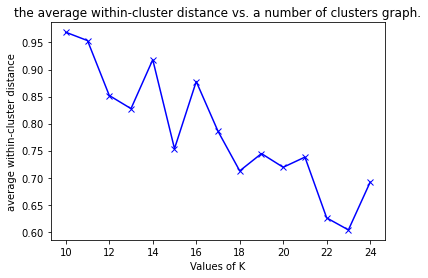

In [103]:
# plotting the average within-cluster distance vs. a number of clusters graph.
plt.plot(ks, avg_dist, 'bx-') 
plt.xlabel('Values of K') 
plt.ylabel('average within-cluster distance') 
plt.title('the average within-cluster distance vs. a number of clusters graph.') 
plt.show()

# 3 (f)

# Compare the Population dataset with the more than 50k dataset

## Compare the proportion of data in each cluster for the more than 50k data to the proportion of data in each cluster for the general population.

In [104]:
model = KMeans(n_clusters=22, random_state=0).fit(data_population_pca)
centers = np.array(model.cluster_centers_)
ks.append(k)
# Create instance of K-Medians algorithm.
kmedians_instance1 = kmedians(data_population_pca, initial_medians = centers)
# Run cluster analysis and obtain results.
kmedians_instance1.process()
clusters = kmedians_instance1.get_clusters()
medians = kmedians_instance1.get_medians()
for i in range(len(clusters)):
    data_population_1.iloc[data_population_1.index.isin(clusters[i]),-1]=i
new_df_population = pd.DataFrame(data_population_pca, columns=['PC1','PC2'])
new_df_population['Label'] = data_population_1['Label']

In [105]:
model = KMeans(n_clusters=22, random_state=0).fit(data_more_than_50k_pca)
centers = np.array(model.cluster_centers_)
ks.append(k)
# Create instance of K-Medians algorithm.
kmedians_instance2 = kmedians(data_more_than_50k_pca, initial_medians = centers)
# Run cluster analysis and obtain results.
kmedians_instance2.process()
clusters = kmedians_instance2.get_clusters()
medians = kmedians_instance2.get_medians()
for i in range(len(clusters)):
    data_more_than_50k_1.iloc[data_more_than_50k_1.index.isin(clusters[i]),-1]=i
new_df_more_than_50k = pd.DataFrame(data_more_than_50k_pca, columns=['PC1','PC2'])
new_df_more_than_50k['Label'] = data_more_than_50k_1['Label']

In [106]:
# proportion of data in each cluster for the more than 50k data and for the general population
population_cluster_prop = new_df_population['Label'].value_counts()/new_df_population.shape[0]
more_than_50k_cluster_prop = new_df_more_than_50k['Label'].value_counts()/new_df_more_than_50k.shape[0]

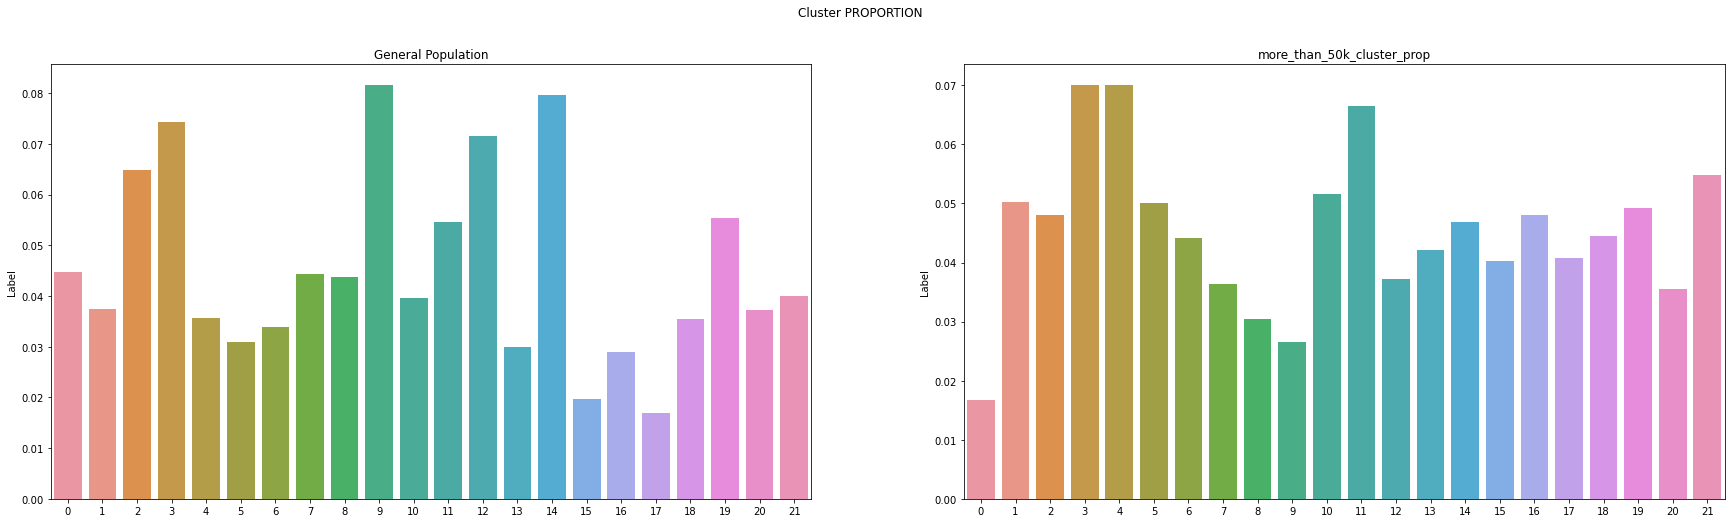

In [107]:
# barplots to show proportion of data in each cluster in the general population and more than 50k data
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(30, 8))
fig.suptitle('Cluster PROPORTION')
ax2.set_title('more_than_50k_cluster_prop')
ax1.set_title('General Population')
sns.barplot(x=more_than_50k_cluster_prop.index, y=more_than_50k_cluster_prop, ax=ax2)
sns.barplot(x=population_cluster_prop.index, y=population_cluster_prop, ax=ax1)
plt.show()

## What kind of people are part of a cluster overrepresented in the more than 50k data compared to the general population?

In [164]:
# Our strategy to find out overreprentation is to sort the clusters in decreasing order of their counts and
# compare the largest cluster of population.csv to that of more_than_50k

# Finding topmost cluster represented

In [130]:
# population dataset
cluster_population = population_cluster_prop.sort_values(ascending=False)
cluster_population

9     0.081685
14    0.079570
3     0.074307
12    0.071470
2     0.064754
19    0.055332
11    0.054510
0     0.044636
7     0.044361
8     0.043820
21    0.039955
10    0.039690
1     0.037484
20    0.037324
4     0.035650
18    0.035409
6     0.033816
5     0.030829
13    0.029906
16    0.028984
15    0.019682
17    0.016825
Name: Label, dtype: float64

In [129]:
# more_than_50k dataset
cluster_more_than_50k = more_than_50k_cluster_prop.sort_values(ascending=False)
cluster_more_than_50k

3     0.070112
4     0.070112
11    0.066480
21    0.054749
10    0.051676
1     0.050279
5     0.050000
19    0.049162
16    0.048045
2     0.048045
14    0.046927
18    0.044413
6     0.044134
13    0.042179
17    0.040782
15    0.040223
12    0.037151
7     0.036313
20    0.035475
8     0.030447
9     0.026536
0     0.016760
Name: Label, dtype: float64

# Applying PCA inverse transform to the features of the topmost cluster

In [ ]:
# The strategy is as follows: We assume that the overrepresented cluster is the one that is having the maximum count for each of the 
# dataset respectively
# As the cluster number are automatically assigned by the function . hence direct differences between similar numbered
# clusters of the two datasets seems to be illogical. Hence we have tried to avoid this.

# We perform inverse transform of PCA to find out the most impactful features.

In [126]:
def plot_scaled_comparison(df_sample, kmedians_instance, cluster, pca):
    #pca inverse transform on clusters
    m = kmedians_instance.get_medians()
    inv_pca= pca.inverse_transform(m[cluster])
    #convert to dict and use columns from full space
    df_dict=dict(zip(df_sample.columns, inv_pca))
    #make dataframe
    df=pd.DataFrame.from_dict(df_dict, orient='index').rename( 
        columns={0: 'feature_values'}).sort_values('feature_values', ascending=False)
    df['feature_values_abs']=abs(df['feature_values'])
    viz_df= pd.concat((df['feature_values'][:10], df['feature_values'][-10:]), axis=0)
    viz_df.plot(kind='barh')

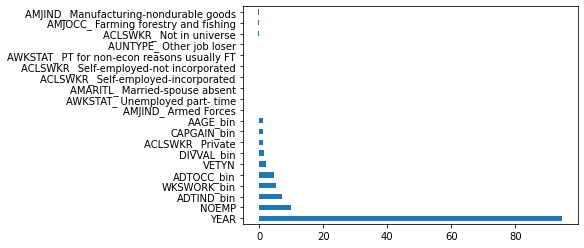

In [127]:
plot_scaled_comparison(data_population, kmedians_instance1,9, pca)

In [132]:
# Description for top 5 features in the population data 
# YEAR: data collected in the year
# NOEMP : num persons worked for employer
# ADTIND_bin: industry code
# WKSWORK_bin: weeks worked in year
# ADTOCC_bin: occupation code

In [133]:
# Filtering records for population data
ind1 = new_df_population[new_df_population['Label'] ==9].index
data_population_clus1 = data_population[new_df_population.index.isin(ind1)]

In [134]:
print(" Min data collected in the year :", data_population_clus1['YEAR'].min())
print(" Max data collected in the year :", data_population_clus1['YEAR'].max())
print(" Mean data collected in the year :", data_population_clus1['YEAR'].mean())
print(" Median data collected in the year :", data_population_clus1['YEAR'].median())
print(" Mode data collected in the year :", data_population_clus1['YEAR'].mode())

 Min data collected in the year : 94
 Max data collected in the year : 95
 Mean data collected in the year : 94.49306663394282
 Median data collected in the year : 94.0
 Mode data collected in the year : 0    94
dtype: int64


In [137]:
print(" Min num persons worked for employer :", data_population_clus1['NOEMP'].min())
print(" Max num persons worked for employer :", data_population_clus1['NOEMP'].max())
print(" Mean num persons worked for employer :", data_population_clus1['NOEMP'].mean())
print(" Median num persons worked for employer :", data_population_clus1['NOEMP'].median())
print(" Mode num persons worked for employer :", data_population_clus1['NOEMP'].mode())

 Min num persons worked for employer : 0
 Max num persons worked for employer : 0
 Mean num persons worked for employer : 0.0
 Median num persons worked for employer : 0.0
 Mode num persons worked for employer : 0    0
dtype: int64


In [138]:
# Minimum and maximum number persons worked for employer are 0 and 0
# Mean of number persons worked for employer is 0
# mode of the number persons worked for employer are 0 
# median of the number persons worked for employer are 0 

In [139]:
print(" Min industry code :", data_population_clus1['ADTIND_bin'].min())
print(" Max industry code :", data_population_clus1['ADTIND_bin'].max())
print(" Mode industry code :", data_population_clus1['ADTIND_bin'].mode())

 Min industry code : 1
 Max industry code : 1
 Mode industry code : 0    1
Name: ADTIND_bin, dtype: category
Categories (7, object): [1 < 2 < 3 < 4 < 5 < 6 < 7]


In [121]:
# minimum, maximum  and mode ADTIND_bin refers to industry code of 1,1  and 1

In [140]:
print(" Min weeks worked in year  :", data_population_clus1['WKSWORK_bin'].min())
print(" Max weeks worked in year  :", data_population_clus1['WKSWORK_bin'].max())
print(" Mode weeks worked in year :", data_population_clus1['WKSWORK_bin'].mode())

 Min weeks worked in year  : 1
 Max weeks worked in year  : 1
 Mode weeks worked in year : 0    1
Name: WKSWORK_bin, dtype: category
Categories (4, object): [1 < 2 < 3 < 4]


In [125]:
# minimum and maximum WKSWORK_bin of 1 and 1 refers to 1 weeks worked in year 

In [141]:
print(" Min occupation code :", data_population_clus1['ADTOCC_bin'].min())
print(" Max occupation code :", data_population_clus1['ADTOCC_bin'].max())
print(" Mode occupation code:", data_population_clus1['ADTOCC_bin'].mode())

 Min occupation code : 1
 Max occupation code : 1
 Mode occupation code: 0    1
Name: ADTOCC_bin, dtype: category
Categories (7, object): [1 < 2 < 3 < 4 < 5 < 6 < 7]


In [142]:
# minimum and maximum ADTOCC_bin of 1 

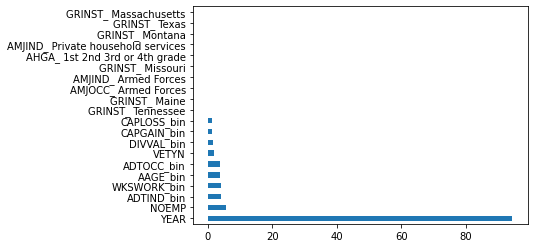

In [144]:
plot_scaled_comparison(data_more_than_50k, kmedians_instance2, 3, pca)

In [129]:
# Description for top 5 features in the more_than_50k data
# YEAR: data collected in the year
# NOEMP: num persons worked for employer
# ADTIND_bin: industry code
# WKSWORK_bin: weeks worked in year
# AAGE_bin: age

In [146]:
# Filtering records for more_than_50k data
ind2 = new_df_more_than_50k[new_df_more_than_50k['Label'] ==3].index
data_more_than_50k_clus2 = data_more_than_50k[new_df_more_than_50k.index.isin(ind2)]

In [147]:
print(" Min data collected in the year :", data_more_than_50k_clus2['YEAR'].min())
print(" Max data collected in the year :", data_more_than_50k_clus2['YEAR'].max())
print(" Mean data collected in the year :", data_more_than_50k_clus2['YEAR'].mean())
print(" Median data collected in the year :", data_more_than_50k_clus2['YEAR'].median())
print(" Mode data collected in the year :", data_more_than_50k_clus2['YEAR'].mode())

 Min data collected in the year : 94
 Max data collected in the year : 95
 Mean data collected in the year : 94.5219123505976
 Median data collected in the year : 95.0
 Mode data collected in the year : 0    95
dtype: int64


In [149]:
# minimum and maximum data collected in the year are 94 and 95 with mean of 94.5219123505976 and median of 94.0

In [150]:
print(" Min num persons worked for employer :", data_more_than_50k_clus2['NOEMP'].min())
print(" Max num persons worked for employer :", data_more_than_50k_clus2['NOEMP'].max())
print(" Mean num persons worked for employer :", data_more_than_50k_clus2['NOEMP'].mean())
print(" Median num persons worked for employer :", data_more_than_50k_clus2['NOEMP'].median())
print(" Mode num persons worked for employer :", data_more_than_50k_clus2['NOEMP'].mode())

 Min num persons worked for employer : 3
 Max num persons worked for employer : 6
 Mean num persons worked for employer : 5.334661354581673
 Median num persons worked for employer : 6.0
 Mode num persons worked for employer : 0    6
dtype: int64


In [134]:
# Minimum and maximum number persons worked for employer are 3 and 6
# Mean of number persons worked for employer is 5.334661354581673
# mode of the number persons worked for employer are 6 
# median of the number persons worked for employer are 6

In [151]:
print(" Min industry code :", data_more_than_50k_clus2['ADTIND_bin'].min())
print(" Max industry code :", data_more_than_50k_clus2['ADTIND_bin'].max())
print(" Mode industry code :", data_more_than_50k_clus2['ADTIND_bin'].mode())

 Min industry code : 4
 Max industry code : 6
 Mode industry code : 0    5
Name: ADTIND_bin, dtype: category
Categories (7, object): [1 < 2 < 3 < 4 < 5 < 6 < 7]


In [152]:
# minimum and maximum ADTIND_bin refers to industry code of 4 and 6

In [153]:
print(" Min weeks worked in year  :", data_more_than_50k_clus2['WKSWORK_bin'].min())
print(" Max weeks worked in year  :", data_more_than_50k_clus2['WKSWORK_bin'].max())
print(" Mode weeks worked in year :", data_more_than_50k_clus2['WKSWORK_bin'].mode())

 Min weeks worked in year  : 2
 Max weeks worked in year  : 4
 Mode weeks worked in year : 0    4
Name: WKSWORK_bin, dtype: category
Categories (4, object): [1 < 2 < 3 < 4]


In [138]:
# minimum and maximum WKSWORK_bin of 2 and 4 refers to 1 to 52 weeks worked in year 

In [154]:
print(" Min age  :", data_more_than_50k_clus2['AAGE_bin'].min())
print(" Max age  :", data_more_than_50k_clus2['AAGE_bin'].max())
print(" Mode age :", data_more_than_50k_clus2['AAGE_bin'].mode())

 Min age  : 1
 Max age  : 7
 Mode age : 0    5
Name: AAGE_bin, dtype: category
Categories (8, object): [1 < 2 < 3 < 4 < 5 < 6 < 7 < 8]


In [140]:
# minimum and maximum AAGE_bin of 1 and 7 refers to age between 18 to 70

## Clusters that are over-represented in the general population vs more than 50k population

In [175]:
# Creating datadframe with proportion_ for population and num_more_than_50k clusters
d1 = pd.DataFrame(cluster_population)
d1['cluster_num'] = d1.index
d1.columns=['proportion_population','cluster_num_population']
d1.reset_index(drop=True, inplace=True)
d2 = pd.DataFrame(cluster_more_than_50k)
d2['cluster_num'] = d2.index
d2.columns=['proportion_more_than_50k','cluster_num_more_than_50k']
d2.reset_index(drop=True, inplace=True)
d_concat = pd.concat([d1, d2], axis=1)
# Difference between cluster proportion
d_concat['Difference'] = d_concat['proportion_population'] - d_concat['proportion_more_than_50k']
d_concat

,proportion_population,cluster_num_population,proportion_more_than_50k,cluster_num_more_than_50k,Difference
0,0.081685,9,0.070112,3,0.011573
1,0.079570,14,0.070112,4,0.009458
2,0.074307,3,0.066480,11,0.007827
3,0.071470,12,0.054749,21,0.016722
4,0.064754,2,0.051676,10,0.013078
5,0.055332,19,0.050279,1,0.005053
6,0.054510,11,0.050000,5,0.004510
7,0.044636,0,0.049162,19,-0.004526
8,0.044361,7,0.048045,16,-0.003684
9,0.043820,8,0.048045,2,-0.004225


In [198]:
# To determine the overrepresentation the clusters formed by each of the two datasets have been sorted on the basis of 
# their percentage counts and the largest clusters have been chosen to find out the maximum overrepresentation. 


# Printing clusters that are over-represented in the general population vs more than 50k population

for x in range(22):
    if(d_concat['Difference'][x]>0):
        print('Population dataset Over - represented compared to more_than_50k by %.5f%%'%(d_concat['Difference'][x]))
    elif(d_concat['Difference'][x]<0):
        print('Population dataset Under - represented compared to more_than_50k by %.5f%%'% ( d_concat['Difference'][x]))

Population dataset Over - represented compared to more_than_50k by 0.01157%
Population dataset Over - represented compared to more_than_50k by 0.00946%
Population dataset Over - represented compared to more_than_50k by 0.00783%
Population dataset Over - represented compared to more_than_50k by 0.01672%
Population dataset Over - represented compared to more_than_50k by 0.01308%
Population dataset Over - represented compared to more_than_50k by 0.00505%
Population dataset Over - represented compared to more_than_50k by 0.00451%
Population dataset Under - represented compared to more_than_50k by -0.00453%
Population dataset Under - represented compared to more_than_50k by -0.00368%
Population dataset Under - represented compared to more_than_50k by -0.00423%
Population dataset Under - represented compared to more_than_50k by -0.00697%
Population dataset Under - represented compared to more_than_50k by -0.00472%
Population dataset Under - represented compared to more_than_50k by -0.00665%


## Analyze a cluster overrepresented in the more than 50k data compared to the general population.

In [181]:
# Cluster 9 is overrepresented in the more than 50k data compared to the general population

In [182]:
def plot_scaled_comparison(df_sample, kmedians_instance, cluster, pca):
    #pca inverse transform on clusters
    m = kmedians_instance.get_medians()
    inv_pca= pca.inverse_transform(m[cluster])
    #convert to dict and use columns from full space
    df_dict=dict(zip(df_sample.columns, inv_pca))
    #make dataframe
    df=pd.DataFrame.from_dict(df_dict, orient='index').rename( 
        columns={0: 'feature_values'}).sort_values('feature_values', ascending=False)
    df['feature_values_abs']=abs(df['feature_values'])
    viz_df= pd.concat((df['feature_values'][:10], df['feature_values'][-10:]), axis=0)
    viz_df.plot(kind='barh')

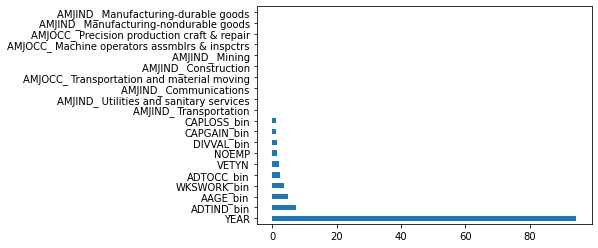

In [183]:
plot_scaled_comparison(data_more_than_50k, kmedians_instance2, 9, pca)

In [185]:
# Description for top 5 features in the more_than_50k data for cluster 9
# YEAR: data collected in the year
# ADTIND_bin: industry code 
# AAGE_bin: age
# WKSWORK_bin: weeks worked in year
# ADTOCC_bin: occupation code

In [186]:
# Filtering records for cluster 5
ind = new_df_more_than_50k[new_df_more_than_50k['Label'] ==5].index
data_more_than_50k_clus5 = data_more_than_50k[new_df_more_than_50k.index.isin(ind)]

In [187]:
print(" Min data collected in the year :", data_more_than_50k_clus5['YEAR'].min())
print(" Max data collected in the year :", data_more_than_50k_clus5['YEAR'].max())
print(" Mean data collected in the year :", data_more_than_50k_clus5['YEAR'].mean())
print(" Median data collected in the year :", data_more_than_50k_clus5['YEAR'].median())
print(" Mode data collected in the year :", data_more_than_50k_clus5['YEAR'].mode())

 Min data collected in the year : 94
 Max data collected in the year : 95
 Mean data collected in the year : 94.47486033519553
 Median data collected in the year : 94.0
 Mode data collected in the year : 0    94
dtype: int64


In [188]:
print(" Min industry code :", data_population_clus1['ADTIND_bin'].min())
print(" Max industry code :", data_population_clus1['ADTIND_bin'].max())
print(" Mode industry code :", data_population_clus1['ADTIND_bin'].mode())

 Min industry code : 1
 Max industry code : 1
 Mode industry code : 0    1
Name: ADTIND_bin, dtype: category
Categories (7, object): [1 < 2 < 3 < 4 < 5 < 6 < 7]


In [189]:
# minimum and maximum industry code are 1 and 1 with mode of1

In [190]:
print(" Min age  :", data_more_than_50k_clus5['AAGE_bin'].min())
print(" Max age  :", data_more_than_50k_clus5['AAGE_bin'].max())
print(" Mode age :", data_more_than_50k_clus5['AAGE_bin'].mode())

 Min age  : 4
 Max age  : 8
 Mode age : 0    8
Name: AAGE_bin, dtype: category
Categories (8, object): [1 < 2 < 3 < 4 < 5 < 6 < 7 < 8]


In [191]:
# minimum and maximum AAGE_bin of 4 and 8 refers to age between 40 to 90

In [192]:
print(" Min weeks worked in year  :", data_more_than_50k_clus5['WKSWORK_bin'].min())
print(" Max weeks worked in year  :", data_more_than_50k_clus5['WKSWORK_bin'].max())
print(" Mode weeks worked in year :", data_more_than_50k_clus5['WKSWORK_bin'].mode())

 Min weeks worked in year  : 1
 Max weeks worked in year  : 4
 Mode weeks worked in year : 0    1
Name: WKSWORK_bin, dtype: category
Categories (4, object): [1 < 2 < 3 < 4]


In [193]:
# minimum and maximum WKSWORK_bin of 1 and 4 refers to 0 to 52 weeks worked in year 

In [194]:
print(" Min occupation code :", data_more_than_50k_clus5['ADTOCC_bin'].min())
print(" Max occupation code :", data_more_than_50k_clus5['ADTOCC_bin'].max())
print(" Mode occupation code:", data_more_than_50k_clus5['ADTOCC_bin'].mode())

 Min occupation code : 1
 Max occupation code : 2
 Mode occupation code: 0    1
Name: ADTOCC_bin, dtype: category
Categories (7, object): [1 < 2 < 3 < 4 < 5 < 6 < 7]


In [195]:
# minimum and maximum ADTOCC_bin of 1 and 4 refers to 1 and 2 occupation code